In [1]:
#!pip install hyperopt
#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn


import pandas as pd
import numpy as np
import sklearn as sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler

2024-05-26 23:27:16.933540: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv("/Users/rjy/Desktop/20200915_lpmc_train_idco_Biogeme.csv")
df.head()

,caseid,tripid,houseid,person_n,trip_n,travel_mode,household_size_int,household_chld,household_Teen,household_Avgage,...,season,day_of_week,time_of_day,dur1,dur2,dur3,dur4,cost3,cost4,pt_interchange
0,1,0,0,0,0,4,3,0,0,41.333333,...,1,4,3,0.218056,0.092222,0.151111,0.052222,1.5,0.14,0
1,2,1,0,0,1,4,3,0,0,41.333333,...,1,4,3,0.188889,0.061944,0.165000,0.059444,1.5,0.15,0
2,3,2,0,0,2,4,3,0,0,41.333333,...,1,4,4,1.037778,0.355833,0.413333,0.236667,1.5,0.79,0
3,4,3,0,0,3,4,3,0,0,41.333333,...,1,4,4,1.039444,0.384444,0.464167,0.233333,1.5,0.78,0
4,5,4,0,1,2,4,3,0,0,41.333333,...,1,4,5,1.037778,0.355833,0.392500,0.229167,1.5,0.78,0


In [3]:
rows,columns = df.shape
rows,columns

(54766, 28)

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

caseid                0
tripid                0
houseid               0
person_n              0
trip_n                0
travel_mode           0
household_size_int    0
household_chld        0
household_Teen        0
household_Avgage      0
car_ownership         0
female                0
age                   0
driving_license       0
purpose               0
fueltype              0
faretype              0
bus_scale             0
season                0
day_of_week           0
time_of_day           0
dur1                  0
dur2                  0
dur3                  0
dur4                  0
cost3                 0
cost4                 0
pt_interchange        0
dtype: int64


In [5]:
column_names = np.array(df.columns)
column_names

array(['caseid', 'tripid', 'houseid', 'person_n', 'trip_n', 'travel_mode',
       'household_size_int', 'household_chld', 'household_Teen',
       'household_Avgage', 'car_ownership', 'female', 'age',
       'driving_license', 'purpose', 'fueltype', 'faretype', 'bus_scale',
       'season', 'day_of_week', 'time_of_day', 'dur1', 'dur2', 'dur3',
       'dur4', 'cost3', 'cost4', 'pt_interchange'], dtype=object)

In [6]:
df.dtypes

caseid                  int64
tripid                  int64
houseid                 int64
person_n                int64
trip_n                  int64
travel_mode             int64
household_size_int      int64
household_chld          int64
household_Teen          int64
household_Avgage      float64
car_ownership           int64
female                  int64
age                     int64
driving_license         int64
purpose                 int64
fueltype                int64
faretype                int64
bus_scale             float64
season                  int64
day_of_week             int64
time_of_day             int64
dur1                  float64
dur2                  float64
dur3                  float64
dur4                  float64
cost3                 float64
cost4                 float64
pt_interchange          int64
dtype: object

In [7]:
df = df.rename(columns={
    'dur1': 'dur_walk',
    'dur2': 'dur_bike',
    'dur3': 'dur_bus',
    'dur4': 'dur_car',
    'cost3': 'cost_bus',
    'cost4': 'cost_car',
    'pt_interchange': 'bus_interchange'
})


In [8]:
df.head()

,caseid,tripid,houseid,person_n,trip_n,travel_mode,household_size_int,household_chld,household_Teen,household_Avgage,...,season,day_of_week,time_of_day,dur_walk,dur_bike,dur_bus,dur_car,cost_bus,cost_car,bus_interchange
0,1,0,0,0,0,4,3,0,0,41.333333,...,1,4,3,0.218056,0.092222,0.151111,0.052222,1.5,0.14,0
1,2,1,0,0,1,4,3,0,0,41.333333,...,1,4,3,0.188889,0.061944,0.165000,0.059444,1.5,0.15,0
2,3,2,0,0,2,4,3,0,0,41.333333,...,1,4,4,1.037778,0.355833,0.413333,0.236667,1.5,0.79,0
3,4,3,0,0,3,4,3,0,0,41.333333,...,1,4,4,1.039444,0.384444,0.464167,0.233333,1.5,0.78,0
4,5,4,0,1,2,4,3,0,0,41.333333,...,1,4,5,1.037778,0.355833,0.392500,0.229167,1.5,0.78,0


In [9]:
df['household_Avgage'] = df['household_Avgage'].round(0).astype(int)
df['dur_walk'] = (df['dur_walk']*60).round(0)
df['dur_bike'] = (df['dur_bike']*60).round(0)
df['dur_bus'] = (df['dur_bus']*60).round(0).astype(int)
df['dur_car'] = (df['dur_car']*60).round(0).astype(int)

In [10]:
df.head()

,caseid,tripid,houseid,person_n,trip_n,travel_mode,household_size_int,household_chld,household_Teen,household_Avgage,...,season,day_of_week,time_of_day,dur_walk,dur_bike,dur_bus,dur_car,cost_bus,cost_car,bus_interchange
0,1,0,0,0,0,4,3,0,0,41,...,1,4,3,13.0,6.0,9,3,1.5,0.14,0
1,2,1,0,0,1,4,3,0,0,41,...,1,4,3,11.0,4.0,10,4,1.5,0.15,0
2,3,2,0,0,2,4,3,0,0,41,...,1,4,4,62.0,21.0,25,14,1.5,0.79,0
3,4,3,0,0,3,4,3,0,0,41,...,1,4,4,62.0,23.0,28,14,1.5,0.78,0
4,5,4,0,1,2,4,3,0,0,41,...,1,4,5,62.0,21.0,24,14,1.5,0.78,0


In [11]:
#df.insert(loc=df.columns.get_loc('cost_bus'), column='cost_walk', value=0)
#df.insert(loc=df.columns.get_loc('cost_bus'), column='cost_bike', value=0)
df.head()

,caseid,tripid,houseid,person_n,trip_n,travel_mode,household_size_int,household_chld,household_Teen,household_Avgage,...,season,day_of_week,time_of_day,dur_walk,dur_bike,dur_bus,dur_car,cost_bus,cost_car,bus_interchange
0,1,0,0,0,0,4,3,0,0,41,...,1,4,3,13.0,6.0,9,3,1.5,0.14,0
1,2,1,0,0,1,4,3,0,0,41,...,1,4,3,11.0,4.0,10,4,1.5,0.15,0
2,3,2,0,0,2,4,3,0,0,41,...,1,4,4,62.0,21.0,25,14,1.5,0.79,0
3,4,3,0,0,3,4,3,0,0,41,...,1,4,4,62.0,23.0,28,14,1.5,0.78,0
4,5,4,0,1,2,4,3,0,0,41,...,1,4,5,62.0,21.0,24,14,1.5,0.78,0


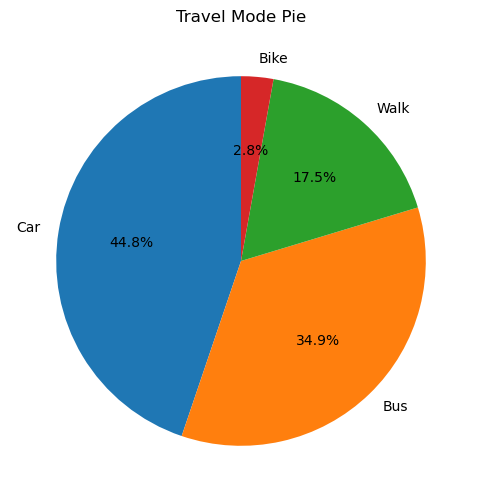

In [12]:
#每一类的比重
mode_counts = df['travel_mode'].value_counts()
mode_mapping = {
    1: "Walk",
    2: "Bike",
    3: "Bus",
    4: "Car"
}
plt.figure(figsize=(6, 6))  
plt.pie(mode_counts, labels=mode_counts.index.map(mode_mapping), autopct='%1.1f%%', startangle=90)
plt.title('Travel Mode Pie')  
plt.show()  


In [13]:
df.describe()

,caseid,tripid,houseid,person_n,trip_n,travel_mode,household_size_int,household_chld,household_Teen,household_Avgage,...,season,day_of_week,time_of_day,dur_walk,dur_bike,dur_bus,dur_car,cost_bus,cost_car,bus_interchange
count,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000,...,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000,54766.000000
mean,27383.500000,27382.500000,5851.664317,0.813004,1.568218,3.069788,2.521345,0.092411,0.268780,38.744604,...,2.523390,1.796224,3.322225,66.939287,21.481832,27.781361,16.843918,1.542072,1.889824,0.361611
std,15809.726758,15809.726758,3393.419994,1.063612,1.803527,1.082275,1.099908,0.289608,0.443329,16.638820,...,1.052459,1.065600,1.094417,66.946475,21.099221,18.575182,15.149221,1.528853,3.479800,0.615166
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,...,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13692.250000,13691.250000,2905.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,26.000000,...,2.000000,1.000000,3.000000,21.000000,7.000000,13.000000,6.000000,0.000000,0.290000,0.000000
50%,27383.500000,27382.500000,5909.000000,0.000000,1.000000,3.000000,2.000000,0.000000,0.000000,34.000000,...,3.000000,1.000000,3.000000,42.000000,14.000000,23.000000,11.000000,1.500000,0.560000,0.000000
75%,41074.750000,41073.750000,8781.000000,1.000000,2.000000,4.000000,4.000000,0.000000,1.000000,48.000000,...,3.000000,3.000000,4.000000,89.000000,28.000000,38.000000,22.000000,2.400000,1.260000,1.000000
max,54766.000000,54765.000000,11724.000000,9.000000,18.000000,4.000000,4.000000,1.000000,1.000000,94.000000,...,4.000000,4.000000,6.000000,557.000000,183.000000,164.000000,124.000000,13.200000,17.160000,4.000000


In [14]:
df = df.drop(df.columns[:5], axis=1)
print(df)

       travel_mode  household_size_int  household_chld  household_Teen  \
0                4                   3               0               0   
1                4                   3               0               0   
2                4                   3               0               0   
3                4                   3               0               0   
4                4                   3               0               0   
...            ...                 ...             ...             ...   
54761            4                   2               0               0   
54762            3                   2               0               0   
54763            3                   2               0               0   
54764            3                   2               0               0   
54765            3                   2               0               0   

       household_Avgage  car_ownership  female  age  driving_license  purpose  \
0                    41       

In [15]:
# from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
# from sklearn.model_selection import cross_validate, StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier

# X = df.drop('travel_mode', axis=1)
# y = df['travel_mode']
# X_train_hp, _, y_train_hp, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# space = {
#     'max_depth': hp.quniform("max_depth", 10, 100, 1),
#     'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 11, 1),
#     'n_estimators': hp.quniform("n_estimators", 100, 500, 50)
# }

# cv_fold = 5
# random_seed_cv = 42
# max_evals = 50

# def hyperparameter_tuning_rf(space):
#     rf_clf = RandomForestClassifier(max_depth=int(space['max_depth']),
#                                     min_samples_leaf=int(space['min_samples_leaf']),
#                                     n_estimators=int(space['n_estimators']),
#                                     random_state=42)
#     skf = StratifiedKFold(n_splits=cv_fold, shuffle=True, random_state=random_seed_cv)
#     scores_rf = cross_validate(rf_clf, X_train_hp, y_train_hp, cv=skf, return_train_score=True, scoring=['accuracy'])
#     accuracy = scores_rf['test_accuracy'].mean()
#     return {'loss': -accuracy, 'status': STATUS_OK}

# # 执行优化
# rf_trials = Trials()
# rf_best = fmin(fn=hyperparameter_tuning_rf,
#                space=space,
#                algo=tpe.suggest,
#                max_evals=max_evals,
#                trials=rf_trials)

# print("The best model parameters are: ")
# print(rf_best)

#100%|█████████| 50/50 [55:10<00:00, 66.21s/trial, best loss: -0.806947775871674]
#The best model parameters are: 
#{'max_depth': 70.0, 'min_samples_leaf': 1.0, 'n_estimators': 350.0}


In [16]:
X = df.drop('travel_mode', axis=1)  #feature
y = df['travel_mode']  # target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(max_depth=70, n_estimators=350, min_samples_leaf=1, random_state=42)
#classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


feature_importance = classifier.feature_importances_
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importance)}

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

sorted_feature_importance

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.76      0.77      1887
           2       0.88      0.10      0.17       299
           3       0.83      0.81      0.82      3860
           4       0.82      0.90      0.86      4908

    accuracy                           0.82     10954
   macro avg       0.83      0.64      0.65     10954
weighted avg       0.82      0.82      0.81     10954

Accuracy Score:
0.8191528208873471


[('dur_walk', 0.11304114716983629),
 ('cost_car', 0.10727056731726843),
 ('car_ownership', 0.08998459738091101),
 ('dur_bus', 0.08123640936586209),
 ('dur_bike', 0.0791668349568667),
 ('dur_car', 0.07865851168301842),
 ('age', 0.0699688084852066),
 ('household_Avgage', 0.06372254202943141),
 ('fueltype', 0.060460110997810894),
 ('driving_license', 0.029736797781516076),
 ('season', 0.02955234976055974),
 ('purpose', 0.029376441515003272),
 ('time_of_day', 0.029230311999399922),
 ('cost_bus', 0.02606363541965491),
 ('day_of_week', 0.025535105705942637),
 ('household_size_int', 0.02511468949902076),
 ('faretype', 0.014241976938649549),
 ('female', 0.013455047425265198),
 ('household_Teen', 0.012290435497606906),
 ('bus_interchange', 0.009284550108202127),
 ('bus_scale', 0.007005003531553606),
 ('household_chld', 0.005604125431413418)]

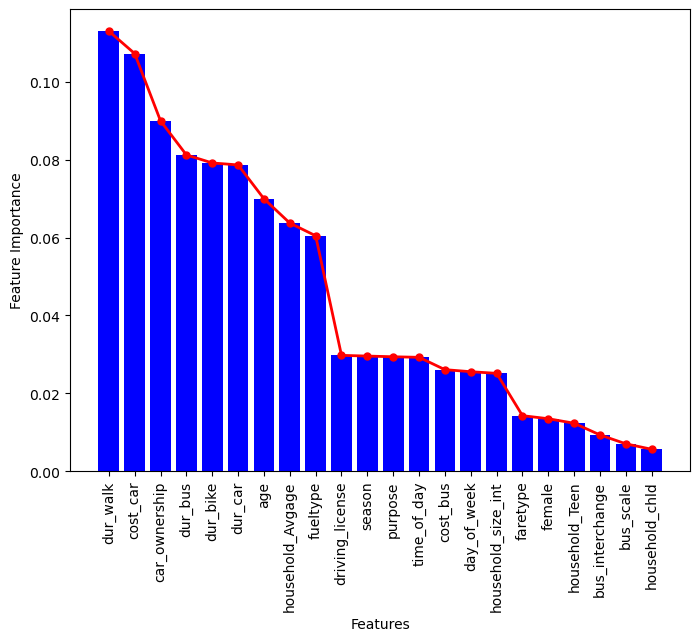

In [17]:
features, importances = zip(*sorted_feature_importance)

plt.figure(figsize=(8, 6))
bars = plt.bar(features, importances, color='blue')
bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]
plt.plot(bar_centers, importances, color='red', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.ylabel('Feature Importance')  
plt.xlabel('Features')  
plt.xticks(rotation=90) 
plt.show()

In [18]:
# 使用bagging提高recall值 效果很差 可能因为太过复杂
X = df.drop('travel_mode', axis=1)  
y = df['travel_mode']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



bagging_classifier = BaggingClassifier(
    RandomForestClassifier(max_depth=70, n_estimators=350, min_samples_leaf=1, class_weight='balanced', random_state=42),
    n_estimators=10,
    random_state=42
)

bagging_classifier.fit(X_train, y_train)

y_pred = bagging_classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.73      0.75      1887
           2       0.90      0.03      0.06       299
           3       0.82      0.78      0.80      3860
           4       0.80      0.89      0.84      4908

    accuracy                           0.80     10954
   macro avg       0.82      0.61      0.61     10954
weighted avg       0.81      0.80      0.79     10954

Accuracy Score:
0.8031769216724485


### rf + smote

In [19]:
X = df.drop('travel_mode', axis=1)  
y = df['travel_mode']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#smote 增加少数类别样本量
#smote = SMOTE(random_state=42)
smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("原始数据类分布：", dict(pd.Series(y_train).value_counts()))
print("欠采样后数据类分布：", dict(pd.Series(y_train_smote).value_counts()))

sm_model = RandomForestClassifier(max_depth=70, n_estimators=350, min_samples_leaf=1, random_state=42)
sm_model.fit(X_train_smote, y_train_smote)
y_pred = sm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


原始数据类分布： {4: 19626, 3: 15244, 1: 7697, 2: 1245}
欠采样后数据类分布： {4: 19626, 2: 19626, 3: 15244, 1: 7697}
Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.75      0.77      1887
           2       0.46      0.40      0.42       299
           3       0.85      0.79      0.82      3860
           4       0.83      0.90      0.86      4908

    accuracy                           0.82     10954
   macro avg       0.73      0.71      0.72     10954
weighted avg       0.82      0.82      0.82     10954

Accuracy Score:
0.8198831477085996


In [20]:
feature_importance = sm_model.feature_importances_
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importance)}

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

sorted_feature_importance

[('dur_walk', 0.10236233786043514),
 ('cost_car', 0.08539916522757207),
 ('dur_bike', 0.07560764120499949),
 ('car_ownership', 0.07227016717210982),
 ('age', 0.07038054033232899),
 ('household_Avgage', 0.06665414053232814),
 ('dur_bus', 0.0658566285272444),
 ('dur_car', 0.0617162160981687),
 ('female', 0.05486756224403086),
 ('fueltype', 0.0542556694125787),
 ('purpose', 0.03990933273153515),
 ('season', 0.03760963568126424),
 ('household_size_int', 0.035703320829809516),
 ('cost_bus', 0.03129063608299784),
 ('time_of_day', 0.03016635808284569),
 ('day_of_week', 0.02919181973431312),
 ('driving_license', 0.019845970509958802),
 ('faretype', 0.018299746732965475),
 ('bus_scale', 0.016442018220188606),
 ('household_Teen', 0.015414920940537044),
 ('bus_interchange', 0.011255564088468279),
 ('household_chld', 0.005500607753319898)]

### rf+adasyn

In [21]:
X = df.drop('travel_mode', axis=1)
y = df['travel_mode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

rf_adasyn_model = RandomForestClassifier(max_depth=70, n_estimators=350, min_samples_leaf=1, random_state=42)
rf_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

y_pred = rf_adasyn_model.predict(X_test)

print("原始数据类分布：", dict(pd.Series(y_train).value_counts()))
print("欠采样后数据类分布：", dict(pd.Series(y_train_adasyn).value_counts()))


print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

原始数据类分布： {4: 19626, 3: 15244, 1: 7697, 2: 1245}
欠采样后数据类分布： {1: 20015, 2: 19844, 4: 19626, 3: 18026}
Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.82      0.77      1887
           2       0.57      0.36      0.44       299
           3       0.85      0.79      0.82      3860
           4       0.85      0.87      0.86      4908

    accuracy                           0.82     10954
   macro avg       0.75      0.71      0.72     10954
weighted avg       0.82      0.82      0.82     10954

Accuracy Score:
0.8180573306554684


### rf+ RandomUnderSampler --效果欠佳

In [22]:
X = df.drop('travel_mode', axis=1)  
y = df['travel_mode']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


print("原始数据类分布：", dict(pd.Series(y_train).value_counts()))
print("欠采样后数据类分布：", dict(pd.Series(y_resampled).value_counts()))

sm_model = RandomForestClassifier(max_depth=70, n_estimators=350, min_samples_leaf=1, random_state=42)
sm_model.fit(X_resampled, y_resampled)
y_pred = sm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


原始数据类分布： {4: 19626, 3: 15244, 1: 7697, 2: 1245}
欠采样后数据类分布： {1: 1245, 2: 1245, 3: 1245, 4: 1245}
Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.80      0.67      1887
           2       0.17      0.63      0.27       299
           3       0.79      0.63      0.70      3860
           4       0.82      0.70      0.76      4908

    accuracy                           0.69     10954
   macro avg       0.59      0.69      0.60     10954
weighted avg       0.75      0.69      0.71     10954

Accuracy Score:
0.6909804637575315


### 集成学习-balanced random --- 效果欠佳

In [23]:
X = df.drop('travel_mode', axis=1)  
y = df['travel_mode']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
b_model = BalancedRandomForestClassifier(n_estimators=70, random_state=42, min_samples_leaf=1, sampling_strategy='auto')
#b_model = RandomForestClassifier(max_depth=70, min_samples_leaf=1, random_state=42)
b_model.fit(X_train, y_train)  

y_pred = b_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

/Users/rjy/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/Users/rjy/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.80      0.68      1887
           2       0.16      0.67      0.26       299
           3       0.80      0.62      0.70      3860
           4       0.83      0.70      0.76      4908

    accuracy                           0.69     10954
   macro avg       0.59      0.70      0.60     10954
weighted avg       0.76      0.69      0.71     10954

Accuracy Score:
0.6869636662406426


## svm + smote -表现差

In [24]:
X = df.drop('travel_mode', axis=1)
y = df['travel_mode']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('smote', SMOTE(random_state=42)),  
    ('svm', SVC(kernel='rbf', gamma='scale', random_state=42))  
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.78      0.66      1887
           2       0.13      0.45      0.20       299
           3       0.81      0.65      0.72      3860
           4       0.83      0.71      0.77      4908

    accuracy                           0.70     10954
   macro avg       0.59      0.65      0.59     10954
weighted avg       0.76      0.70      0.72     10954

Accuracy Score:
0.6968230783275515


### 神经网络-表现一般

In [25]:
X = df.drop('travel_mode', axis=1).values
y = df['travel_mode'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#smote = SMOTE(random_state=42)
smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))
print("Accuracy Score:")
print(accuracy_score(y_true, y_pred_classes))

Epoch 1/50
1944/1944 [==============================] - 3s 1ms/step - loss: 0.8679 - accuracy: 0.6345
Epoch 2/50
1944/1944 [==============================] - 3s 1ms/step - loss: 0.7446 - accuracy: 0.7007
Epoch 3/50
1944/1944 [==============================] - 2s 1ms/step - loss: 0.6746 - accuracy: 0.7349
Epoch 4/50
1944/1944 [==============================] - 2s 1ms/step - loss: 0.6300 - accuracy: 0.7559
Epoch 5/50
1944/1944 [==============================] - 3s 1ms/step - loss: 0.5952 - accuracy: 0.7687
Epoch 6/50
1944/1944 [==============================] - 2s 1ms/step - loss: 0.5717 - accuracy: 0.7785
Epoch 7/50
1944/1944 [==============================] - 3s 2ms/step - loss: 0.5507 - accuracy: 0.7864
Epoch 8/50
1944/1944 [==============================] - 2s 985us/step - loss: 0.5335 - accuracy: 0.7933
Epoch 9/50
1944/1944 [==============================] - 2s 1ms/step - loss: 0.5201 - accuracy: 0.7970
Epoch 10/50
1944/1944 [==============================] - 2s 1ms/step - loss: 0.5

### 采用rf+smote 并进行可视化


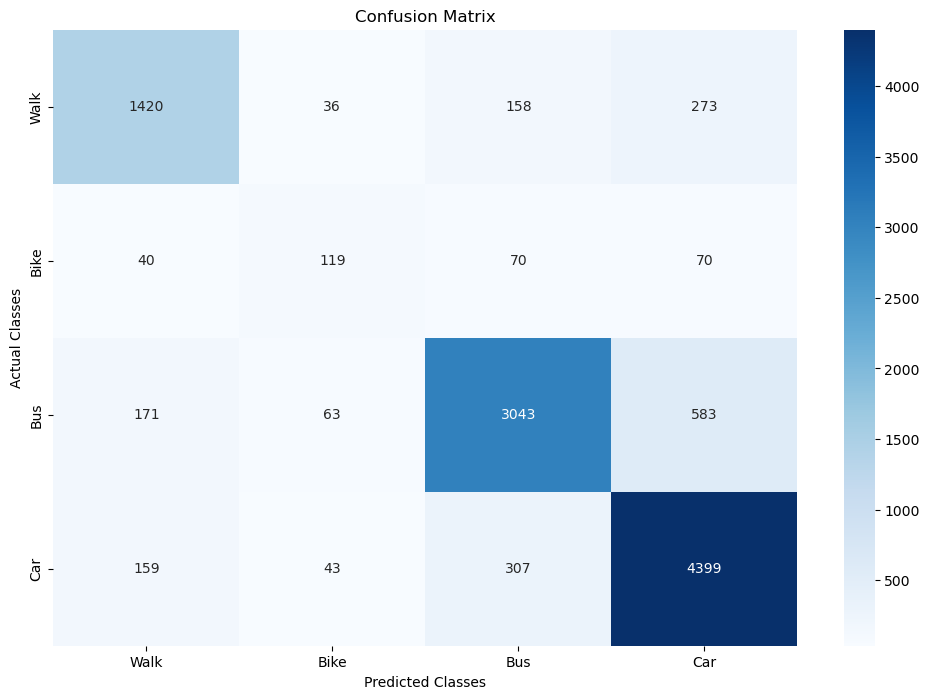

In [26]:
X = df.drop('travel_mode', axis=1)  
y = df['travel_mode']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

sm_model = RandomForestClassifier(max_depth=70, n_estimators=350, min_samples_leaf=1, random_state=42)
sm_model.fit(X_train_smote, y_train_smote)
y_pred = sm_model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Walk', 'Bike', 'Bus', 'Car'], 
            yticklabels=['Walk', 'Bike', 'Bus', 'Car'])

plt.title('Confusion Matrix')
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
plt.show()

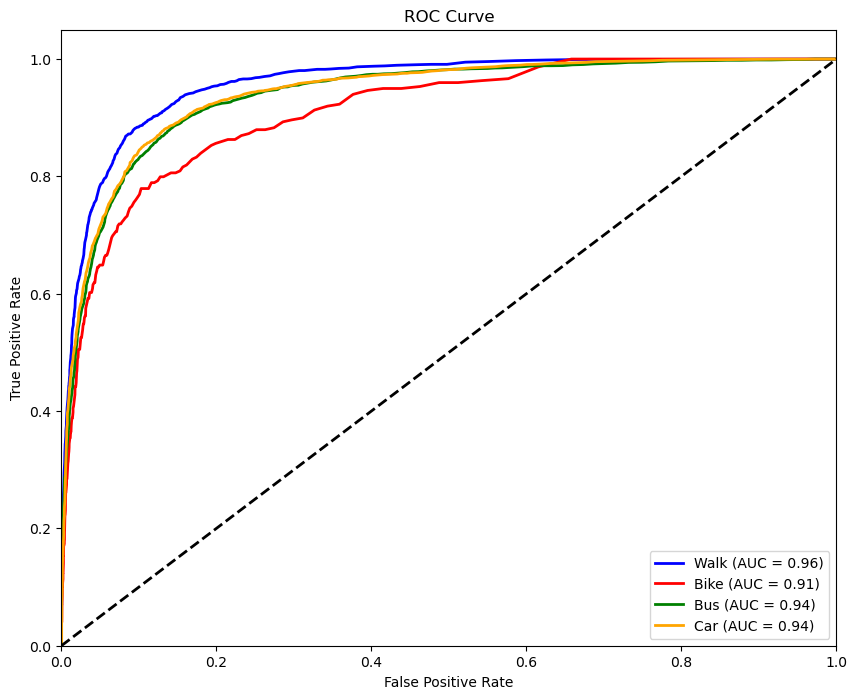

In [27]:
classes = np.unique(y) 

y_pred_proba = sm_model.predict_proba(X_test)

y_test_bin = label_binarize(y_test, classes=classes)

fpr = {}
tpr = {}
roc_auc = {}

for i, label in enumerate(classes):
    fpr[label], tpr[label], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[label] = auc(fpr[label], tpr[label])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']
class_tag = ['Walk', 'Bike', 'Bus', 'Car']
for i, color, tag in zip(classes, colors, class_tag):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (AUC = {1:0.2f})'.format(tag, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 进行聚类分析来探究用户群体

In [28]:
column_names = np.array(df.columns)
column_names

array(['travel_mode', 'household_size_int', 'household_chld',
       'household_Teen', 'household_Avgage', 'car_ownership', 'female',
       'age', 'driving_license', 'purpose', 'fueltype', 'faretype',
       'bus_scale', 'season', 'day_of_week', 'time_of_day', 'dur_walk',
       'dur_bike', 'dur_bus', 'dur_car', 'cost_bus', 'cost_car',
       'bus_interchange'], dtype=object)

In [29]:
df_temp = df.copy()
y = df_temp.drop(['travel_mode', 'purpose', 'fueltype', 'faretype', 'bus_scale', 'season', 'day_of_week', 'time_of_day', 'dur_walk', 'dur_bike', 'dur_bus', 'dur_car', 'cost_bus', 'cost_car'], axis=1)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(y)
clusters = kmeans.labels_

X_clustered = pd.DataFrame(y, columns=y.columns)
X_clustered['Cluster'] = clusters

summary = X_clustered.groupby('Cluster').mean()
summary

/Users/rjy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,household_size_int,household_chld,household_Teen,household_Avgage,car_ownership,female,age,driving_license,bus_interchange
Cluster,,,,,,,,,
0,2.323269,0.005705,0.231897,46.721671,1.106557,0.493022,52.268323,0.794698,0.390415
1,2.605917,0.122746,0.286249,30.972213,0.968142,0.549207,36.166438,0.763834,0.409467
2,1.605442,0.000000,0.184509,69.797589,1.045113,0.528941,70.592195,0.715360,0.263516
3,3.108587,0.173264,0.323383,25.269666,0.912178,0.524912,15.729180,0.199942,0.324320


### 分成四个数据集进行聚类

### 第一类聚类 mode = walk

In [59]:
df_temp2 = df.copy()
df_temp2 = df_temp2.drop(['bus_interchange', 'purpose', 'fueltype', 'faretype', 'bus_scale', 'season', 'day_of_week', 'time_of_day', 'dur_walk', 'dur_bike', 'dur_bus', 'dur_car', 'cost_bus', 'cost_car'], axis=1)  

In [60]:
df_mode1 = df_temp2[df_temp2['travel_mode'] == 1].drop('travel_mode', axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
df_mode1['cluster'] = kmeans.fit_predict(df_mode1)

result_one = df_mode1.groupby('cluster').mean().reset_index()
result_one

/Users/rjy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,household_size_int,household_chld,household_Teen,household_Avgage,car_ownership,female,age,driving_license
0,0,2.457080,0.094889,0.277085,34.630472,0.761800,0.597701,40.447542,0.647591
1,1,2.877073,0.166953,0.293025,25.063179,0.683533,0.534591,17.964837,0.245569
2,2,1.652979,0.001002,0.189785,63.750626,0.822233,0.487732,65.441662,0.653480


In [61]:
print("Cluster Centers:\n", kmeans.cluster_centers_) 
print("Labels:", kmeans.labels_)                        

Cluster Centers:
 [[2.45797599e+00 9.50747366e-02 2.77628032e-01 3.46434697e+01
  7.60842931e-01 5.98137711e-01 4.04680225e+01 6.46900270e-01]
 [2.87507131e+00 1.66571592e-01 2.92355961e-01 2.50698802e+01
  6.84826013e-01 5.34227039e-01 1.79922989e+01 2.47290359e-01]
 [1.65297947e+00 1.00150225e-03 1.89784677e-01 6.37506259e+01
  8.22233350e-01 4.87731597e-01 6.54416625e+01 6.53480220e-01]]
Labels: [2 0 0 ... 0 0 0]


/Users/rjy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rjy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rjy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rjy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rjy/anaconda3/lib/pyt

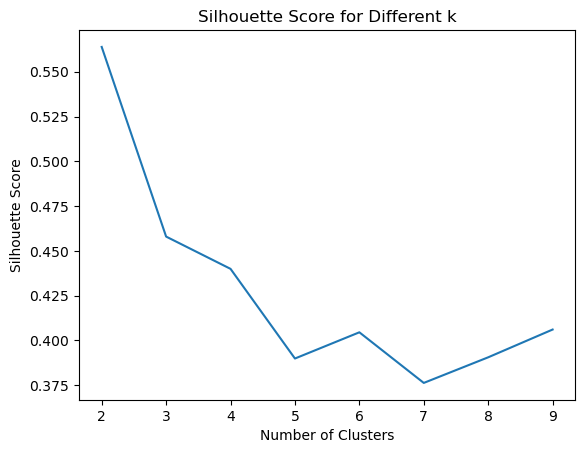

In [62]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_mode1)
    scores.append(silhouette_score(df_mode1, kmeans.labels_))

plt.plot(range(2, 10), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()


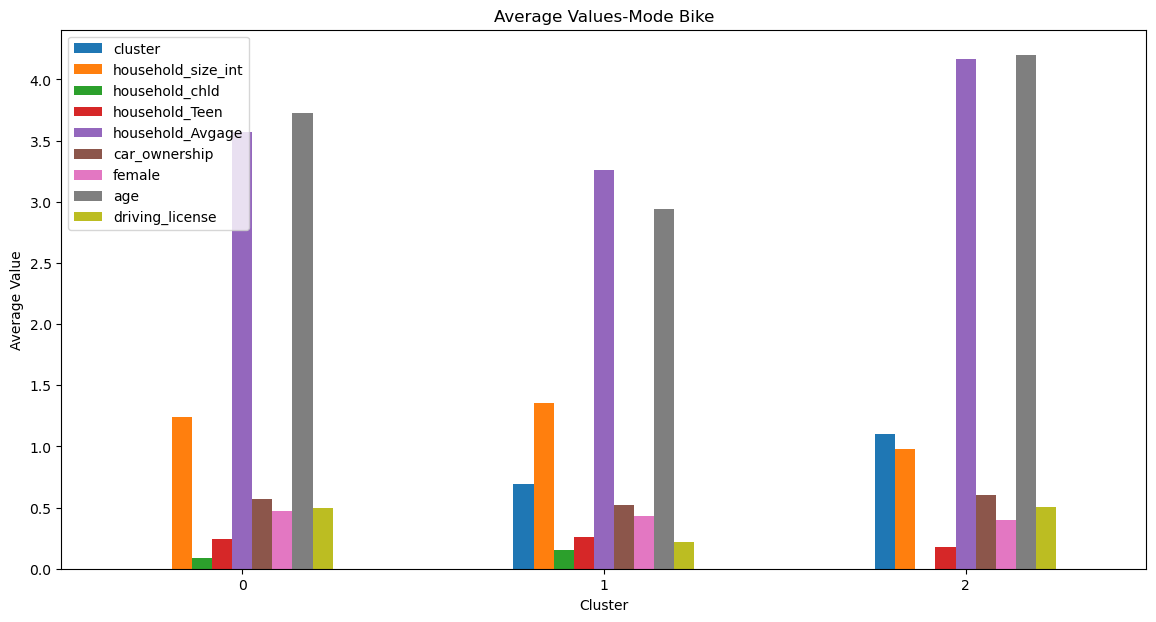

In [63]:
np.log1p(result_one).plot(kind='bar', figsize=(14, 7))
plt.title('Average Values-Mode Bike')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)  
plt.show()

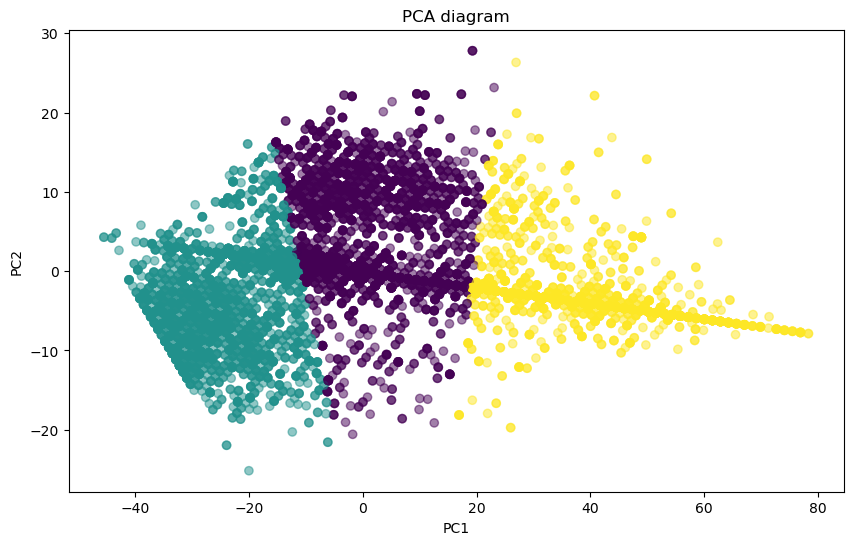

In [64]:
pca = PCA(n_components=3)
components = pca.fit_transform(df_mode1.drop('cluster', axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=df_mode1['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA diagram')
plt.show()

In [65]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
labels = kmeans.labels_

silhouette_avg = silhouette_score(df_mode1, labels)
print("Silhouette Score: ", silhouette_avg)

db_index = davies_bouldin_score(df_mode1, labels)
print("Davies-Bouldin Index: ", db_index)

ch_index = calinski_harabasz_score(df_mode1, labels)
print("Calinski-Harabasz Index: ", ch_index)

Silhouette Score:  0.40604289190167536
Davies-Bouldin Index:  0.7952894298507803
Calinski-Harabasz Index:  17878.390973531423


### 第二类聚类 mode = bike

In [66]:
df_mode2 = df_temp2[df_temp2['travel_mode'] == 2].drop('travel_mode', axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
df_mode2['cluster'] = kmeans.fit_predict(df_mode2)

result_two = df_mode2.groupby('cluster').mean().reset_index()
result_two

/Users/rjy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,household_size_int,household_chld,household_Teen,household_Avgage,car_ownership,female,age,driving_license
0,0,2.391437,0.120795,0.304281,35.555046,0.833333,0.301223,41.422018,0.883792
1,1,2.366942,0.062810,0.196694,28.348760,0.611570,0.310744,23.109091,0.504132
2,2,1.817544,0.000000,0.224561,57.687719,1.056140,0.270175,59.687719,0.828070


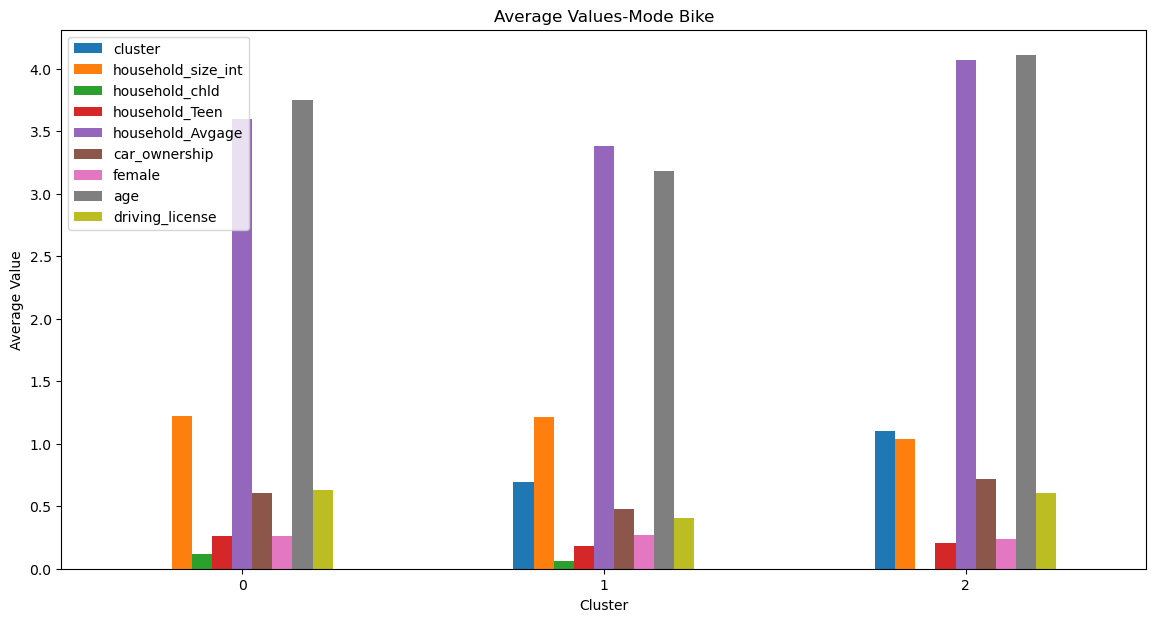

In [67]:
#柱状图
np.log1p(result_two).plot(kind='bar', figsize=(14, 7))
plt.title('Average Values-Mode Bike')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)  
plt.show()

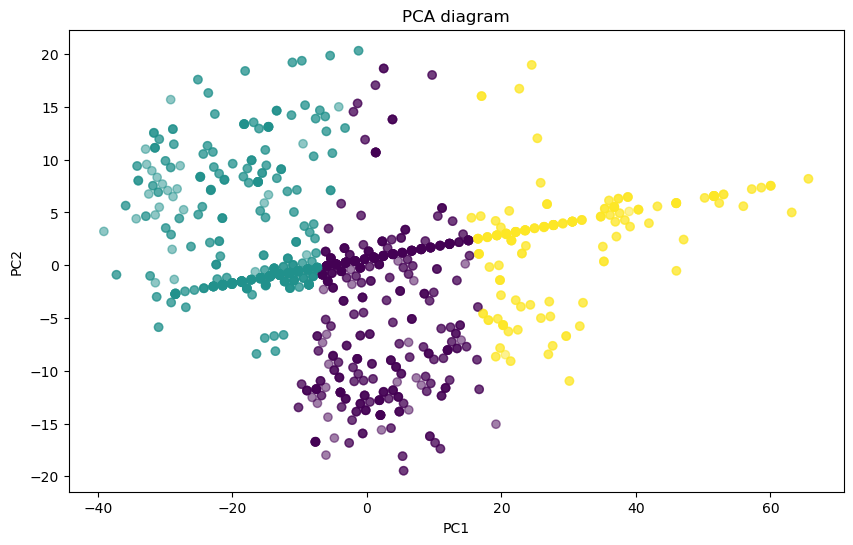

In [68]:
pca = PCA(n_components=3)
components = pca.fit_transform(df_mode2.drop('cluster', axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=df_mode2['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA diagram')
plt.show()


In [69]:
labels = kmeans.labels_

silhouette_avg = silhouette_score(df_mode2, labels)
print("Silhouette Score: ", silhouette_avg)

db_index = davies_bouldin_score(df_mode2, labels)
print("Davies-Bouldin Index: ", db_index)

ch_index = calinski_harabasz_score(df_mode2, labels)
print("Calinski-Harabasz Index: ", ch_index)

Silhouette Score:  0.41088578883600024
Davies-Bouldin Index:  0.826059111634073
Calinski-Harabasz Index:  2089.2657920796037


### 第三类聚类 mode = bus

In [70]:
df_mode3 = df_temp2[df_temp2['travel_mode'] == 3].drop('travel_mode', axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
df_mode3['cluster'] = kmeans.fit_predict(df_mode3)

result_three = df_mode3.groupby('cluster').mean().reset_index()
result_three

/Users/rjy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,household_size_int,household_chld,household_Teen,household_Avgage,car_ownership,female,age,driving_license
0,0,2.363177,0.050505,0.253444,38.780839,0.719773,0.512550,43.597796,0.638965
1,1,2.682541,0.102431,0.289392,26.792265,0.566409,0.544530,22.367403,0.335028
2,2,1.574716,0.000568,0.185227,67.750568,0.637784,0.551705,69.075852,0.534375


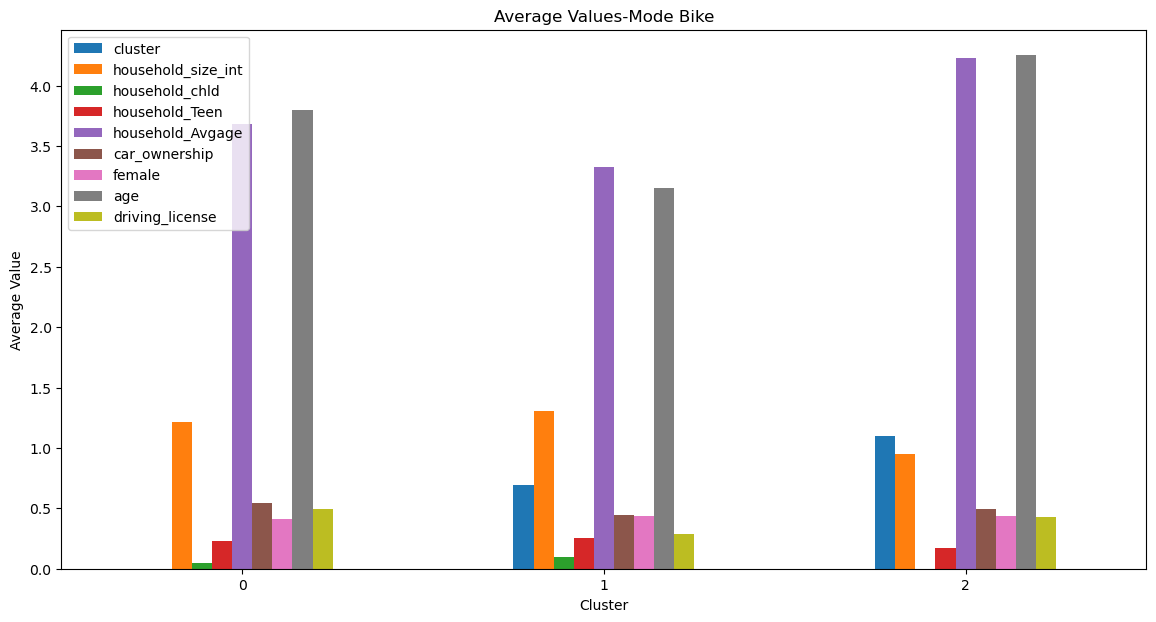

In [71]:
#柱状图
np.log1p(result_three).plot(kind='bar', figsize=(14, 7))
plt.title('Average Values-Mode Bike')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)  
plt.show()

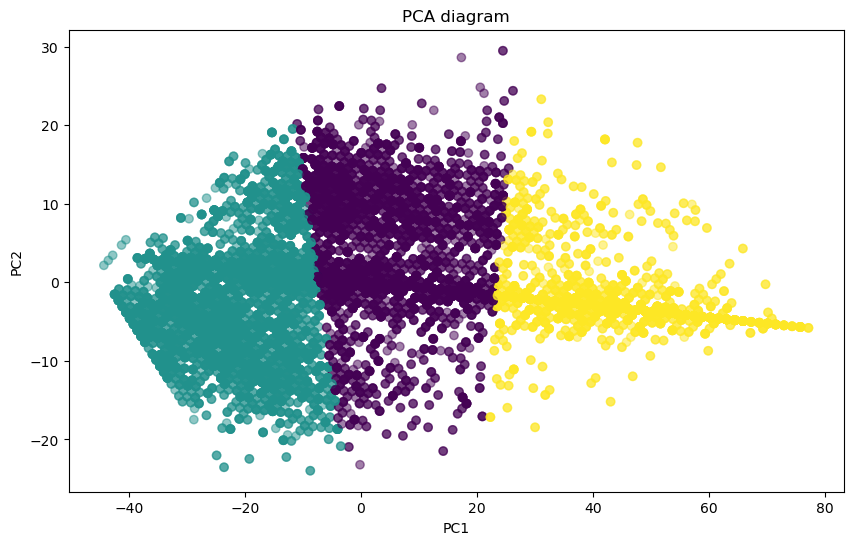

In [72]:
pca = PCA(n_components=3)
components = pca.fit_transform(df_mode3.drop('cluster', axis=1))
plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=df_mode3['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA diagram')
plt.show()

In [73]:
labels = kmeans.labels_

silhouette_avg = silhouette_score(df_mode3, labels)
print("Silhouette Score: ", silhouette_avg)

db_index = davies_bouldin_score(df_mode3, labels)
print("Davies-Bouldin Index: ", db_index)

ch_index = calinski_harabasz_score(df_mode3, labels)
print("Calinski-Harabasz Index: ", ch_index)

Silhouette Score:  0.4625588275024043
Davies-Bouldin Index:  0.7260221034781164
Calinski-Harabasz Index:  39949.439393425804


### 第四类聚类 mode = car

In [74]:
df_mode4 = df_temp2[df_temp2['travel_mode'] == 4].drop('travel_mode', axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
df_mode4['cluster'] = kmeans.fit_predict(df_mode4)

result_four = df_mode4.groupby('cluster').mean().reset_index()
result_four

/Users/rjy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cluster,household_size_int,household_chld,household_Teen,household_Avgage,car_ownership,female,age,driving_license
0,0,3.168220,0.213197,0.342950,26.463678,1.360556,0.542092,17.251516,0.377275
1,1,1.842836,0.001322,0.191869,64.451991,1.422740,0.507519,66.136672,0.890431
2,2,2.843057,0.107642,0.289577,34.565336,1.383828,0.531133,43.066615,0.938246


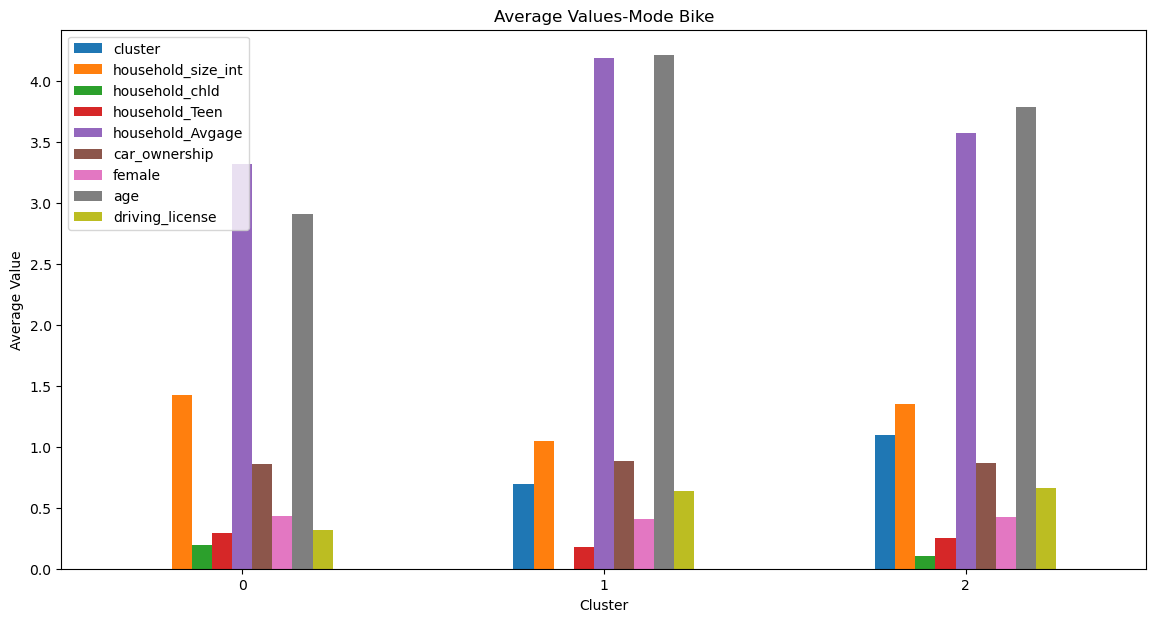

In [75]:
np.log1p(result_four).plot(kind='bar', figsize=(14, 7))
plt.title('Average Values-Mode Bike')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)  
plt.show()

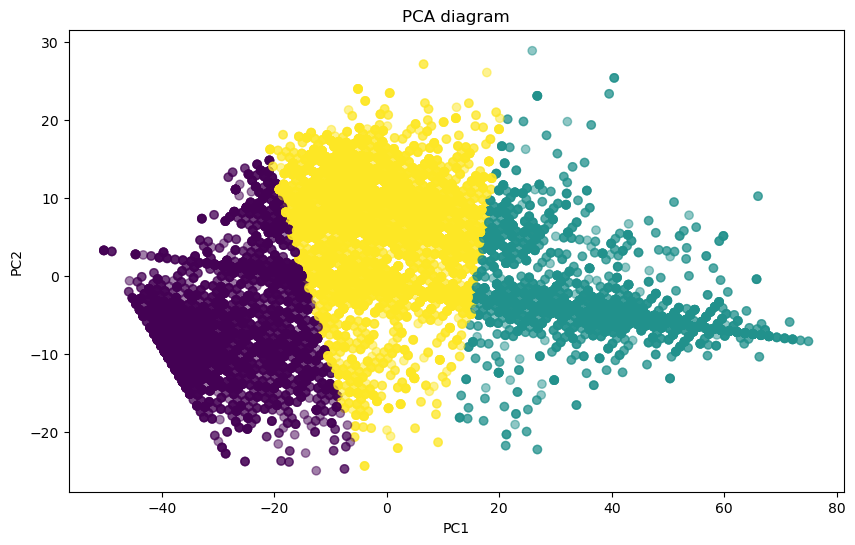

In [76]:
pca = PCA(n_components=3)
components = pca.fit_transform(df_mode4.drop('cluster', axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=df_mode4['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA diagram')
plt.show()

In [77]:
labels = kmeans.labels_

silhouette_avg = silhouette_score(df_mode4, labels)
print("Silhouette Score: ", silhouette_avg)

db_index = davies_bouldin_score(df_mode4, labels)
print("Davies-Bouldin Index: ", db_index)

ch_index = calinski_harabasz_score(df_mode4, labels)
print("Calinski-Harabasz Index: ", ch_index)

Silhouette Score:  0.46878347854506475
Davies-Bouldin Index:  0.7094518454675006
Calinski-Harabasz Index:  45851.003164505324


### 分析比较用户群体基于聚类结果

In [78]:
result_one.columns

Index(['cluster', 'household_size_int', 'household_chld', 'household_Teen',
       'household_Avgage', 'car_ownership', 'female', 'age',
       'driving_license'],
      dtype='object')

In [79]:
result_one['mode'] = 'Walk'
result_two['mode'] = 'Bike'
result_three['mode'] = 'Bus'
result_four['mode'] = 'Car'

final_result = pd.concat([result_one, result_two, result_three, result_four], ignore_index=True)
final_result

,cluster,household_size_int,household_chld,household_Teen,household_Avgage,car_ownership,female,age,driving_license,mode
0,0,2.457080,0.094889,0.277085,34.630472,0.761800,0.597701,40.447542,0.647591,Walk
1,1,2.877073,0.166953,0.293025,25.063179,0.683533,0.534591,17.964837,0.245569,Walk
2,2,1.652979,0.001002,0.189785,63.750626,0.822233,0.487732,65.441662,0.653480,Walk
3,0,2.391437,0.120795,0.304281,35.555046,0.833333,0.301223,41.422018,0.883792,Bike
4,1,2.366942,0.062810,0.196694,28.348760,0.611570,0.310744,23.109091,0.504132,Bike
5,2,1.817544,0.000000,0.224561,57.687719,1.056140,0.270175,59.687719,0.828070,Bike
6,0,2.363177,0.050505,0.253444,38.780839,0.719773,0.512550,43.597796,0.638965,Bus
7,1,2.682541,0.102431,0.289392,26.792265,0.566409,0.544530,22.367403,0.335028,Bus
8,2,1.574716,0.000568,0.185227,67.750568,0.637784,0.551705,69.075852,0.534375,Bus
9,0,3.168220,0.213197,0.342950,26.463678,1.360556,0.542092,17.251516,0.377275,Car


### 行为模式分析

[聚类0 - 女性偏多的中年家庭，可能居住在城市]

[聚类1 - 年轻家庭或者大学生群体，可能居住在城市，可能由于经济原因或健康、环保意识选择步行]

[聚类2 - 老年人少子女为主的群体， 尽管有车率高，但是可能因为健康原因步行 ]

[聚类3 - 家庭中可能有在校青少年的中年群体，拥有车辆但选择自行车为短途出行方式，]

[聚类4 - 年轻人或者在校学生，拥有车率低选择骑车]

[聚类5 - 老人为主的群体，有车多， 但选择自行车]

[聚类6 - 可能居住在公共交通较便利的地区，可能没车选择公共交通]

[聚类7 - 没车学生群体]

[聚类8 - 老年人群体]

[聚类9 - 年轻的家庭群体，拥有多辆车， 住在郊区]

[聚类10 - 老年人住郊区 有多辆车]

[聚类11 - 正常三口之家]


## 同一种出行方式分析

##### walk mode

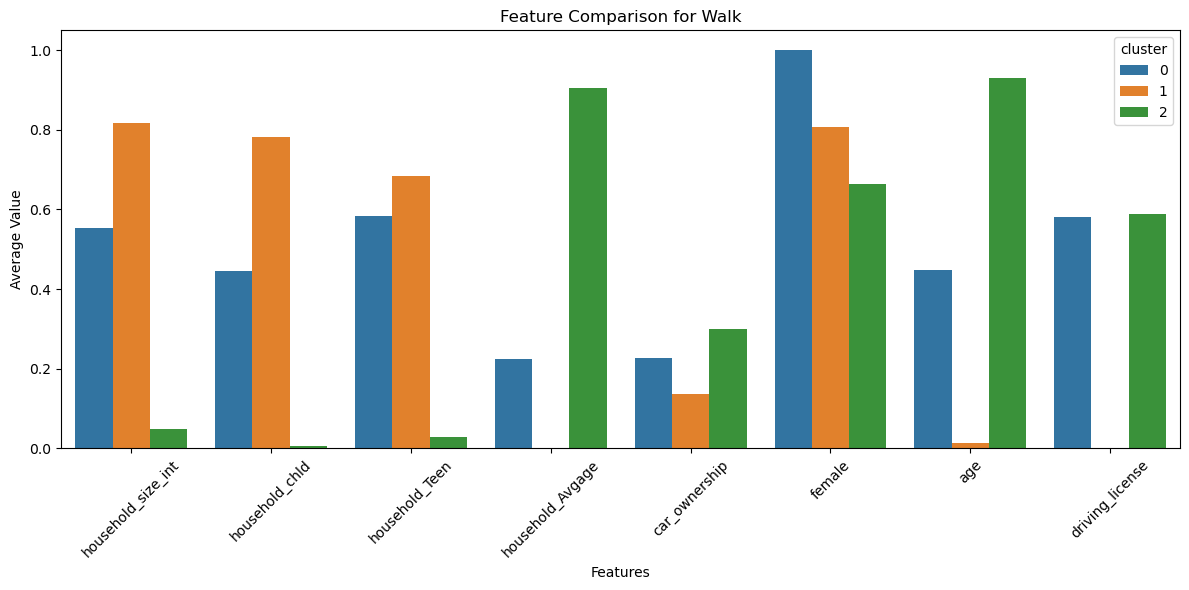

In [98]:
plt.figure(figsize=(12, 6))
mode_data = final_result[final_result['mode'] == 'Walk']
features = ['household_size_int', 'household_chld', 'household_Teen', 'household_Avgage', 'car_ownership', 'female', 'age', 'driving_license']
scaler = MinMaxScaler()
final_result[features] = scaler.fit_transform(final_result[features])
melted_data = mode_data.melt(id_vars=['cluster'], var_name='feature', value_vars=features)
sns.barplot(x='feature', y='value', hue='cluster', data=melted_data)
plt.title(f'Feature Comparison for Walk')
plt.xticks(rotation=45)  
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

#### 分析

[观察： 家庭成员比较少 - 老年人的家庭 更加偏好走路作为出行方式]

[观察： 家庭成员相对较多 - 非常非常年轻化 - 但是没有驾照的家庭 更加偏好走路作为出行方式]

[观察： 家庭成员 中年年龄 - 女性偏多的家庭 更加偏好走路作为出行方式]

#### Bike mode

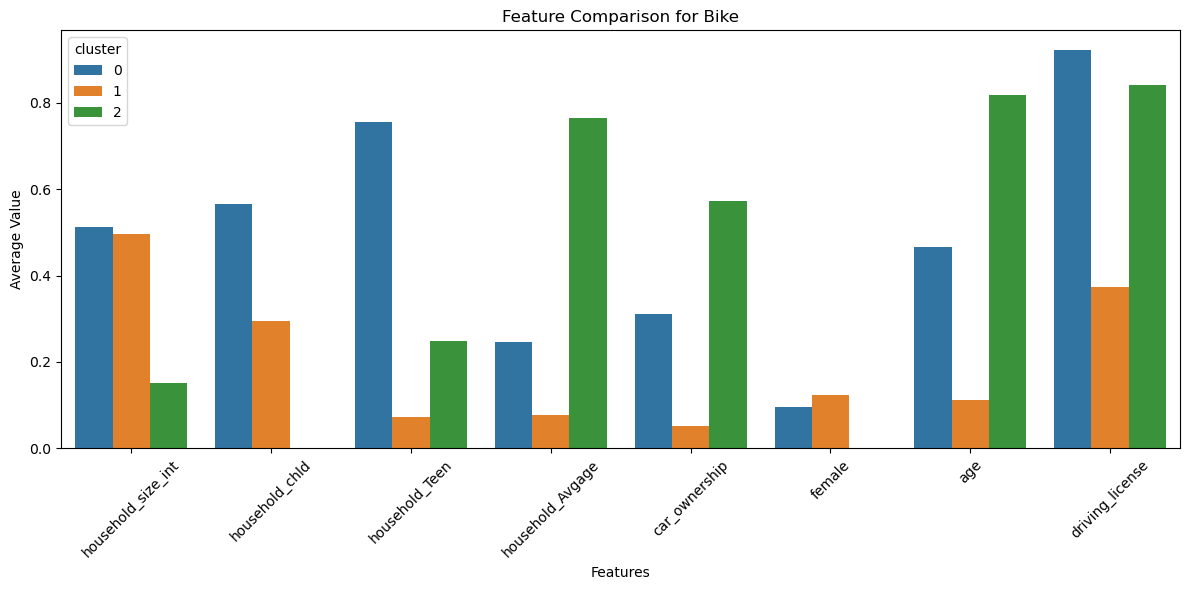

In [102]:
plt.figure(figsize=(12, 6))
mode_data = final_result[final_result['mode'] == 'Bike']
features = ['household_size_int', 'household_chld', 'household_Teen', 'household_Avgage', 'car_ownership', 'female', 'age', 'driving_license']
scaler = MinMaxScaler()
final_result[features] = scaler.fit_transform(final_result[features])
melted_data = mode_data.melt(id_vars=['cluster'], var_name='feature', value_vars=features)
sns.barplot(x='feature', y='value', hue='cluster', data=melted_data)
plt.title(f'Feature Comparison for Bike')
plt.xticks(rotation=45)  
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

#### 分析

[观察： 家庭成员比较少 - 老年人 - 男性较多 的家庭  更加偏好骑自行车作为出行方式]

[观察： 家庭成员比较多 - 青少年 - 男性较多 的家庭  更加偏好骑自行车作为出行方式]


#### Bus mode

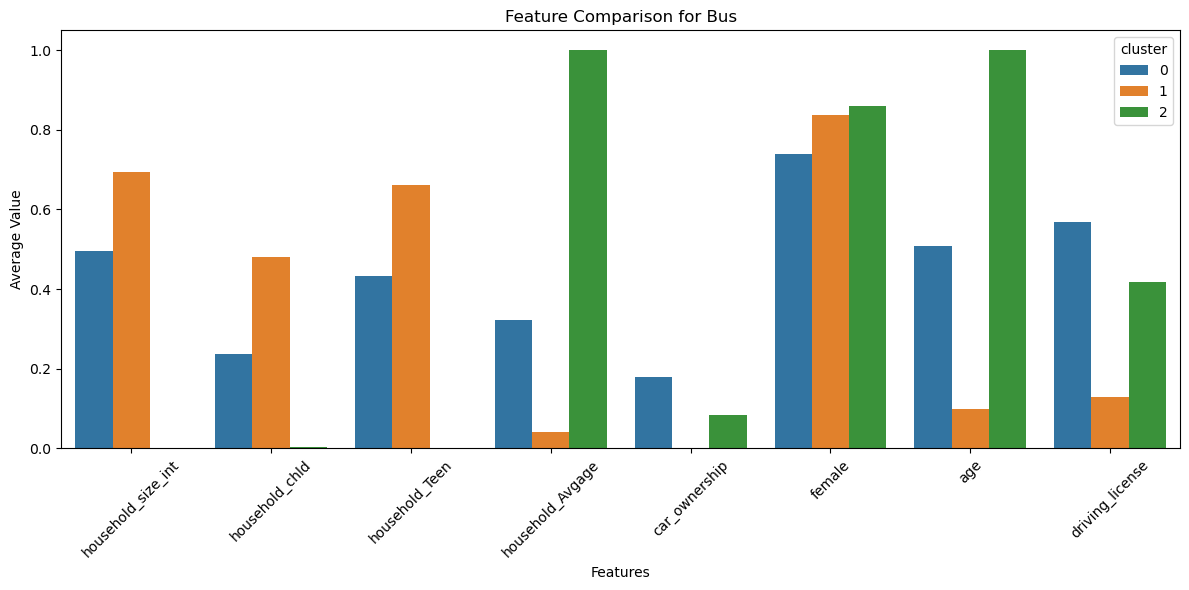

In [103]:
plt.figure(figsize=(12, 6))
mode_data = final_result[final_result['mode'] == 'Bus']
features = ['household_size_int', 'household_chld', 'household_Teen', 'household_Avgage', 'car_ownership', 'female', 'age', 'driving_license']
scaler = MinMaxScaler()
final_result[features] = scaler.fit_transform(final_result[features])
melted_data = mode_data.melt(id_vars=['cluster'], var_name='feature', value_vars=features)
sns.barplot(x='feature', y='value', hue='cluster', data=melted_data)
plt.title(f'Feature Comparison for Bus')
plt.xticks(rotation=45)  
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

#### 分析

[观察： 家庭成员非常少 - 老年人 - 汽车拥有量很少 的家庭 更加偏好坐公交车作为出行方式]

[观察： 家庭成员比较多 - 青少年 - 汽车拥有量及少 的家庭 更加偏好坐公交车作为出行方式]

#### Car mode

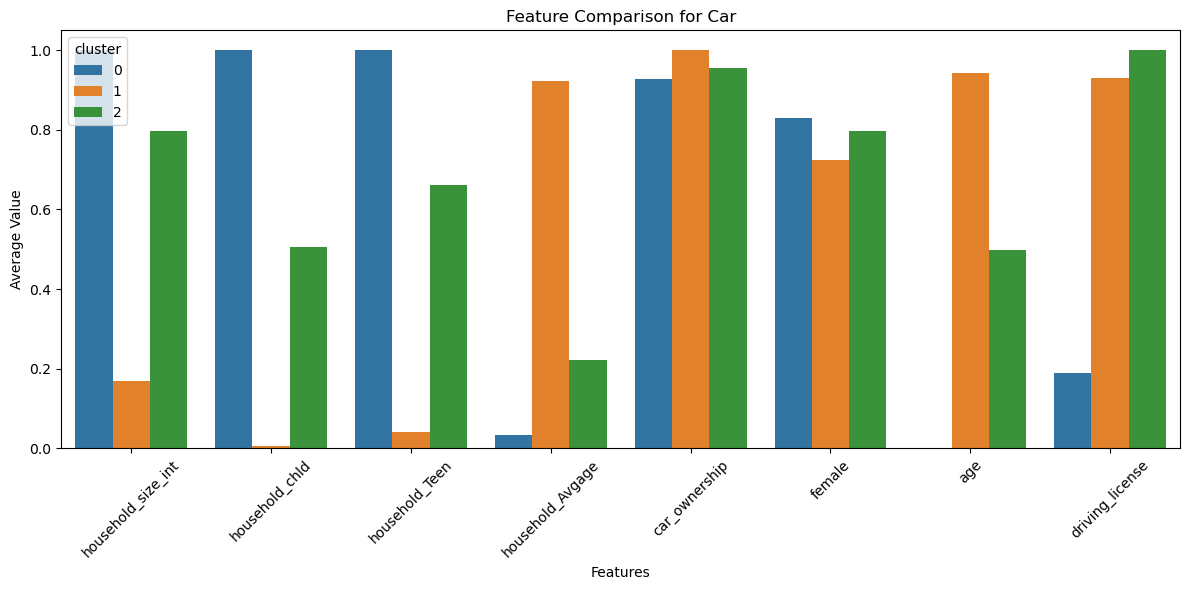

In [104]:
plt.figure(figsize=(12, 6))
mode_data = final_result[final_result['mode'] == 'Car']
features = ['household_size_int', 'household_chld', 'household_Teen', 'household_Avgage', 'car_ownership', 'female', 'age', 'driving_license']
scaler = MinMaxScaler()
final_result[features] = scaler.fit_transform(final_result[features])
melted_data = mode_data.melt(id_vars=['cluster'], var_name='feature', value_vars=features)
sns.barplot(x='feature', y='value', hue='cluster', data=melted_data)
plt.title(f'Feature Comparison for Car')
plt.xticks(rotation=45)  
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

#### 分析

[观察： 家庭成员非常多 - 非常年轻 - 小孩青少年多 的家庭 更加偏好开车作为出行方式]

[观察： 家庭成员较少 - 青少年很少 - 老年人 的家庭 更加偏好坐公交开车为出行方式]

## 跨多种出行方式分析

 ### 重要性影响因素（随机森林分类）
    
 ('car_ownership', 0.07227016717210982)

 ('age', 0.07038054033232899)
    
 ('household_Avgage', 0.06665414053232814)

 ('female', 0.05486756224403086)
    
 ('household_size_int', 0.035703320829809516)

 ('driving_license', 0.019845970509958802)
    
 ('household_Teen', 0.015414920940537044)

 ('household_chld', 0.005500607753319898)

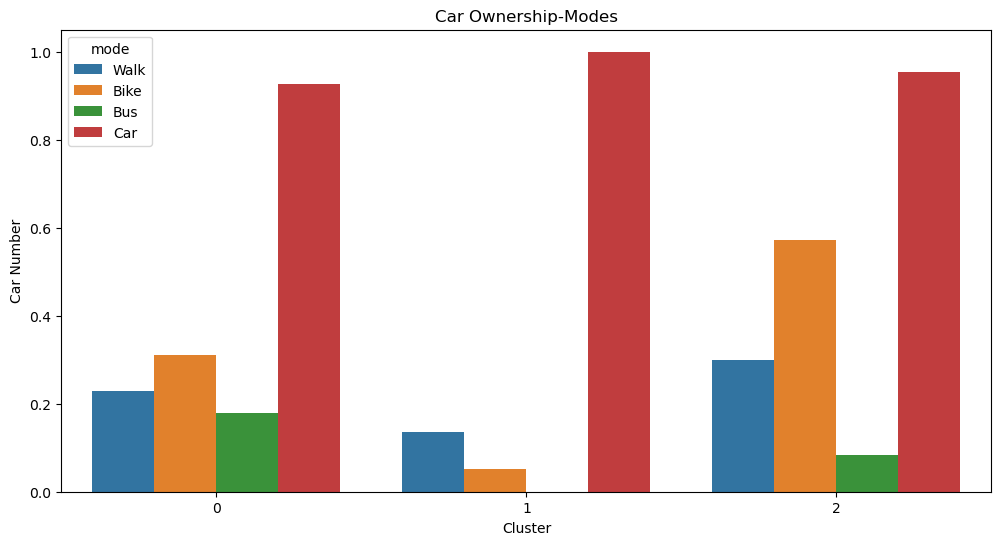

In [107]:
plt.figure(figsize=(12, 6))
sns.barplot(data=final_result, x='cluster', y='car_ownership', hue='mode')
plt.title('Car Ownership-Modes')
plt.ylabel('Car Number')
plt.xlabel('Cluster')
plt.show()

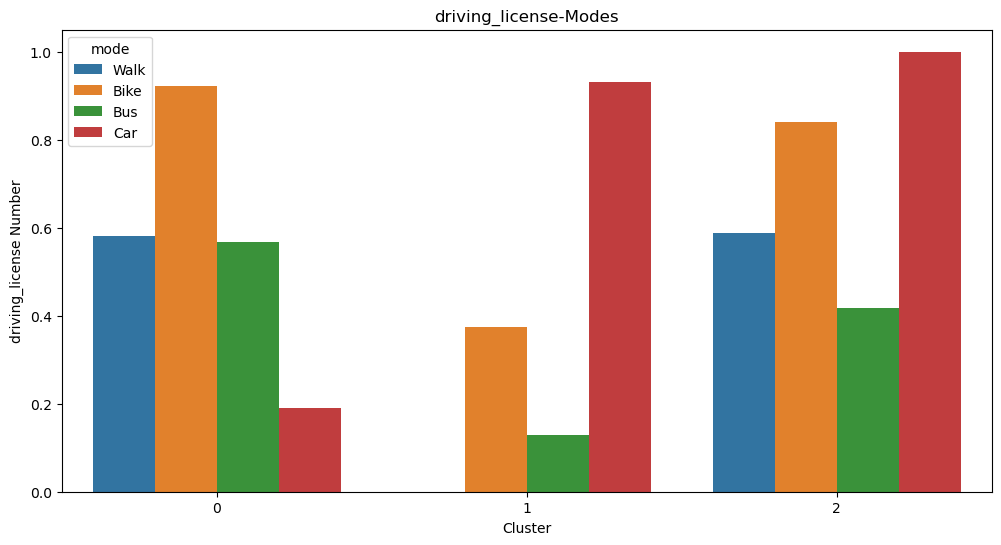

In [114]:
plt.figure(figsize=(12, 6))
sns.barplot(data=final_result, x='cluster', y='driving_license', hue='mode')
plt.title('driving_license-Modes')
plt.ylabel('driving_license Number')
plt.xlabel('Cluster')
plt.show()

#### 分析 

[观察：Car Ownership 指数越高 选择开车的越多，坐公交车的越少]

[观察：驾照 指数越低 越可能步行或公交车]

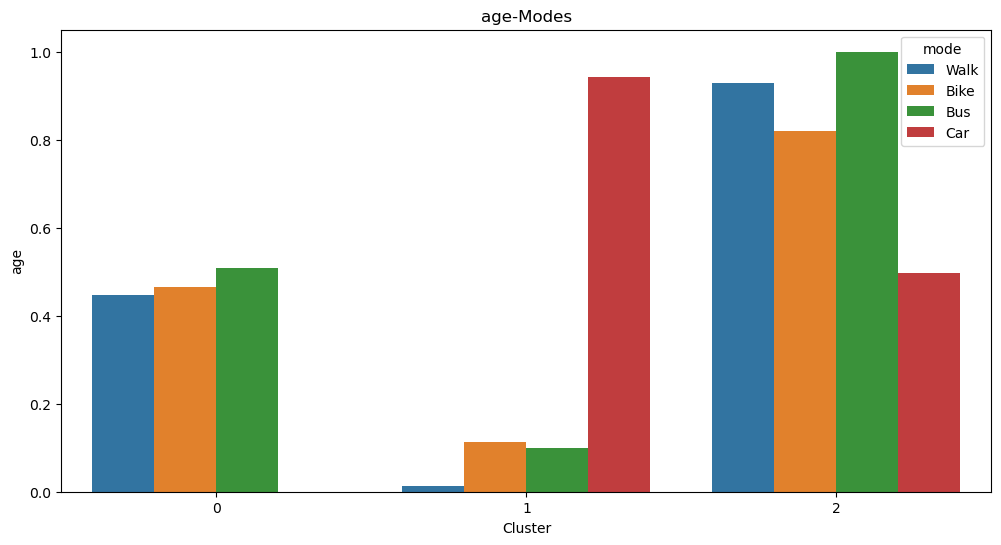

In [109]:
plt.figure(figsize=(12, 6))
sns.barplot(data=final_result, x='cluster', y='age', hue='mode')
plt.title('age-Modes')
plt.ylabel('age')
plt.xlabel('Cluster')
plt.show()

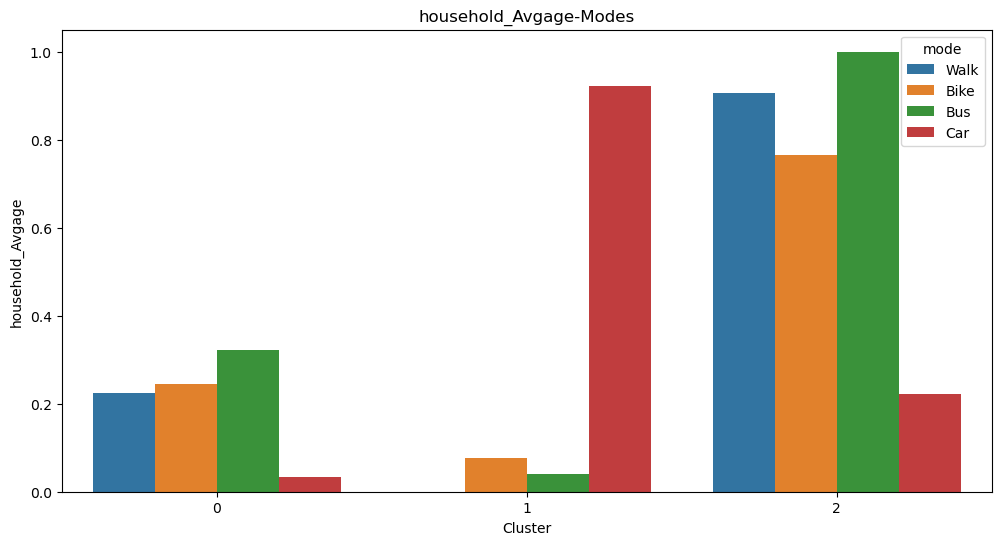

In [108]:
plt.figure(figsize=(12, 6))
sns.barplot(data=final_result, x='cluster', y='household_Avgage', hue='mode')
plt.title('household_Avgage-Modes')
plt.ylabel('household_Avgage')
plt.xlabel('Cluster')
plt.show()

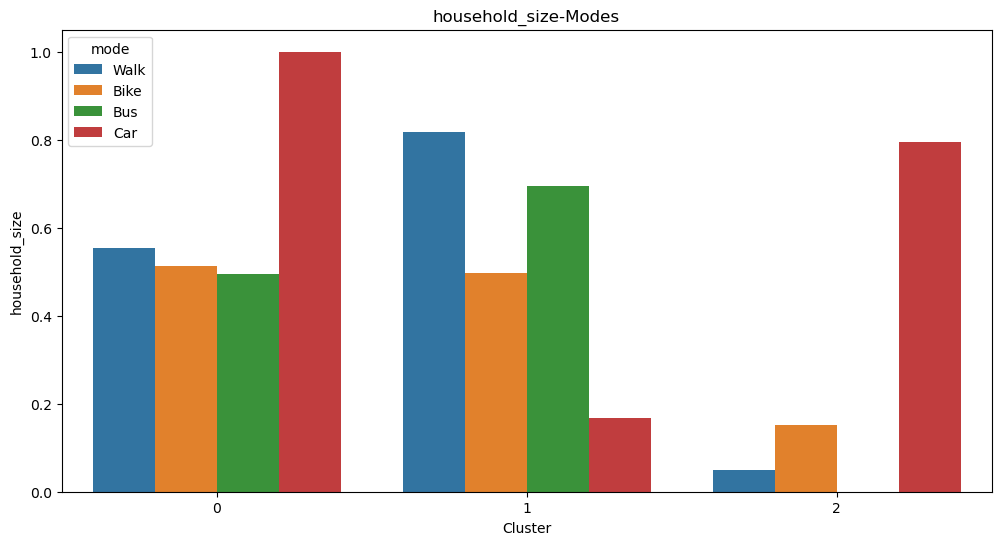

In [110]:
plt.figure(figsize=(12, 6))
sns.barplot(data=final_result, x='cluster', y='household_size_int', hue='mode')
plt.title('household_size-Modes')
plt.ylabel('household_size')
plt.xlabel('Cluster')
plt.show()


#### 分析

[观察：很难直接的观测出年龄的影响]

[观察：家庭成员越多 越偏好开车]

[观察：家庭成员越少 越偏好自行车]

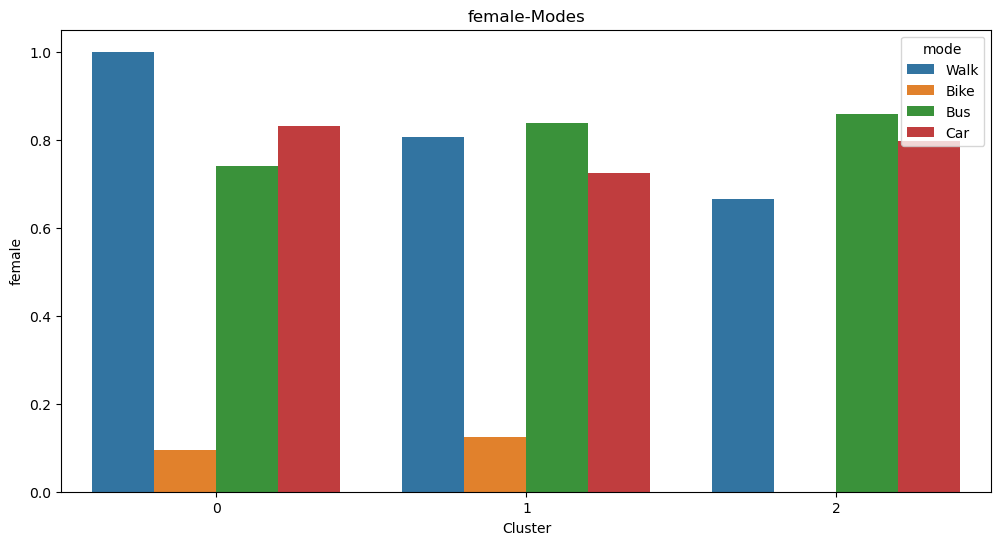

In [113]:
plt.figure(figsize=(12, 6))
sns.barplot(data=final_result, x='cluster', y='female', hue='mode')
plt.title('female-Modes')
plt.ylabel('female')
plt.xlabel('Cluster')
plt.show()

#### 分析

[观察：女性骑车比例非常少]

[观察：女性步行和坐公交车比例偏多]

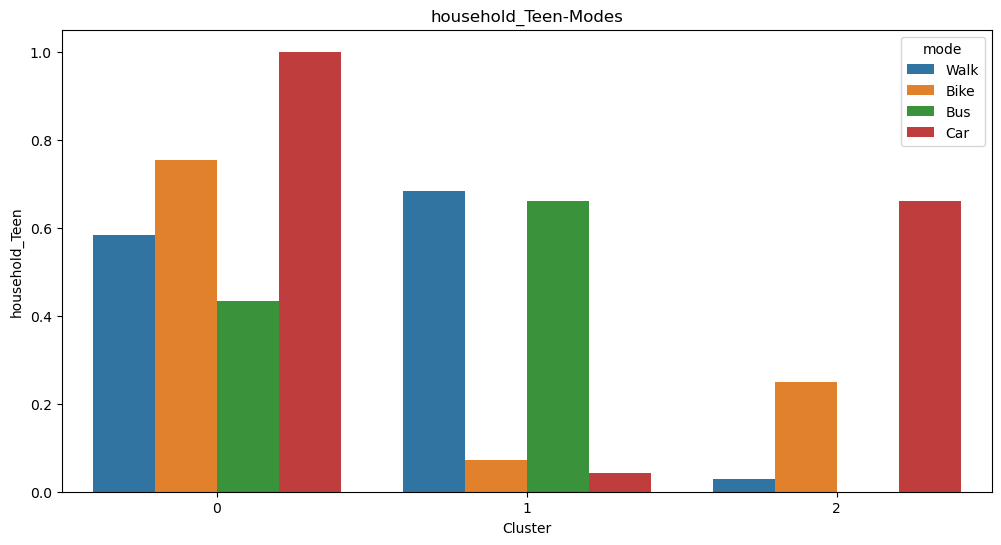

In [115]:
plt.figure(figsize=(12, 6))
sns.barplot(data=final_result, x='cluster', y='household_Teen', hue='mode')
plt.title('household_Teen-Modes')
plt.ylabel('household_Teen')
plt.xlabel('Cluster')
plt.show()

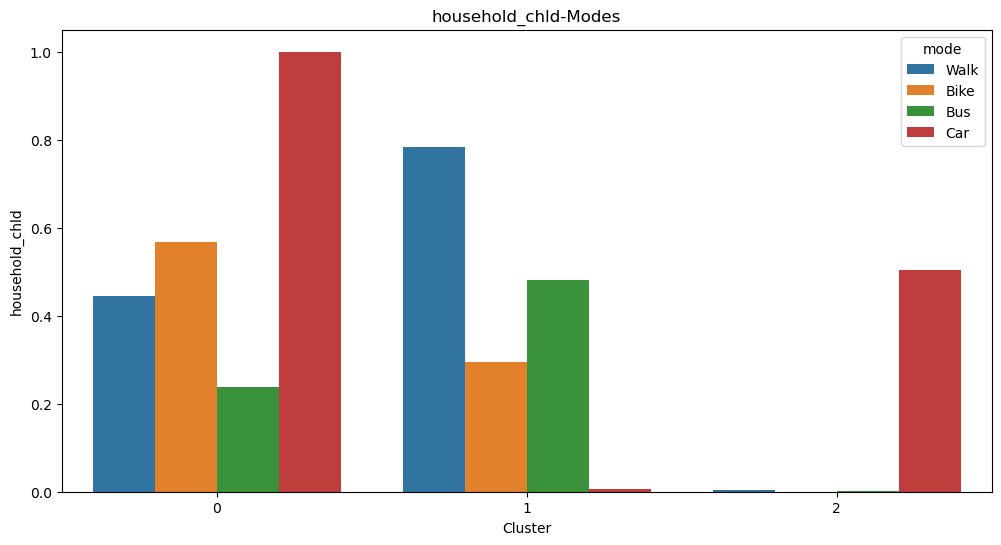

In [116]:
plt.figure(figsize=(12, 6))
sns.barplot(data=final_result, x='cluster', y='household_chld', hue='mode')
plt.title('household_chld-Modes')
plt.ylabel('household_chld')
plt.xlabel('Cluster')
plt.show()

#### 分析

[观察：小孩青少年越多 越可能坐车]

### ANOVA 测试

In [127]:
features = ['household_size_int', 'household_chld', 'household_Teen', 'household_Avgage', 'car_ownership', 'female', 'age', 'driving_license']

for feature in features:
    f_value, p_value = f_oneway(final_result[final_result['mode'] == 'Walk'][feature],
                                final_result[final_result['mode'] == 'Bike'][feature],
                                final_result[final_result['mode'] == 'Bus'][feature],
                                final_result[final_result['mode'] == 'Car'][feature])
    
    print("For feature " + feature + ": ")
    print(f"F-Value: {f_value}, P-Value: {p_value}")

    if p_value < 0.05:
        print("Reject the null hypothesis - Significant differences exist between groups.\n")
    else:
        print("Fail to reject the null hypothesis - No significant difference between groups.\n")


For feature household_size_int: 
F-Value: 0.36161265357406847, P-Value: 0.782599107802057
Fail to reject the null hypothesis - No significant difference between groups.

For feature household_chld: 
F-Value: 0.3202457618249182, P-Value: 0.8107636619491722
Fail to reject the null hypothesis - No significant difference between groups.

For feature household_Teen: 
F-Value: 0.1898152592722082, P-Value: 0.9004051389520523
Fail to reject the null hypothesis - No significant difference between groups.

For feature household_Avgage: 
F-Value: 0.02392622632713573, P-Value: 0.994584412222923
Fail to reject the null hypothesis - No significant difference between groups.

For feature car_ownership: 
F-Value: 21.671114588017172, P-Value: 0.00033877425873865216
Reject the null hypothesis - Significant differences exist between groups.

For feature female: 
F-Value: 40.93813342373816, P-Value: 3.3569116307309754e-05
Reject the null hypothesis - Significant differences exist between groups.

For feat

## 是否拥有汽车（car_ownership）和性别（female）是决定travel mode的决定性因素


### 比较有说服力的推断

[是否拥有汽车更偏好开车/不偏好公交车]

[女性不偏好骑自行车]

------------------------------
继续 做 ab test

1. 提出假设

2. 选择目标群体

3. 选择对照组

4. 控制变量 / 收集数据 

5. 统计学知识 计算p 值

6. reject or accept hypo ho

7. 得出结果